In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# For better plots
sns.set(style="whitegrid")

In [2]:
ic50_data = pd.read_csv('cancer_cell_line_data1.csv', encoding="latin1")  

print("IC50 Data Shape:", ic50_data.shape)

ic50_data.head()

IC50 Data Shape: (2425, 8)


,Drugs,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Smiles
0,Paclitaxel,LC-2-ad,LUAD,lung,lung_NSCLC_adenocarcinoma,0.001262,0.256296,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
1,NaN,TE-15,ESCA,aero_digestive_tract,oesophagus,0.001272,0.271805,NaN
2,NaN,PSN1,PAAD,pancreas,pancreas,0.001334,0.242556,NaN
3,NaN,TE-11,ESCA,aero_digestive_tract,oesophagus,0.001370,0.259042,NaN
4,NaN,MZ1-PC,PAAD,pancreas,pancreas,0.001675,0.307640,NaN


In [3]:
nervous_system_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'nervous_system']

print("Nervous System Cell line Shape:", nervous_system_cell_lines.shape)

# Print all nervous system cell line rows
print(nervous_system_cell_lines.to_string(index=False))

Nervous System Cell line Shape: (195, 8)
       Drugs   Cell line TCGA classification         Tissue Tissue sub-type      IC50      AUC                                                                                                                                                                                                                                 Smiles
          NaN       GI-1                 LGG nervous_system          glioma  0.003228 0.387841                                                                                                                                                                                                                                    NaN
          NaN     KALS-1                 LGG nervous_system          glioma  0.003318 0.413337                                                                                                                                                                                                                     

In [4]:
ic50_data.columns = ic50_data.columns.str.strip()

In [5]:
nervous_system_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'nervous_system']

In [6]:
ic50_nervous_avg = nervous_system_cell_lines.groupby(['Cell line', 'Drugs'], as_index=False)['IC50'].mean()
pivot_table = ic50_nervous_avg.pivot(index='Drugs', columns='Cell line', values='IC50')


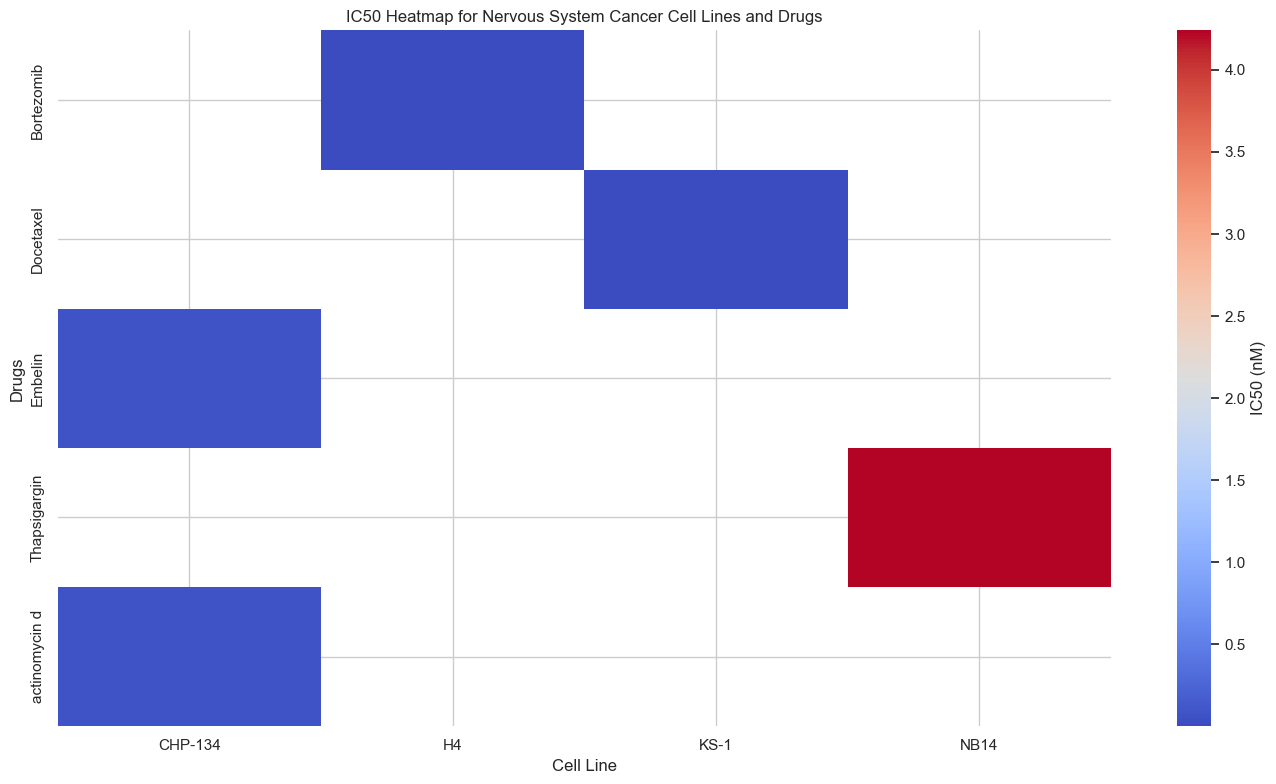

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'IC50 (nM)'})
plt.title('IC50 Heatmap for Nervous System Cancer Cell Lines and Drugs')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.tight_layout()
# Save as PNG
plt.savefig("IC50_Heatmap_nervous system Cancer.png", dpi=300, bbox_inches='tight')
plt.show()

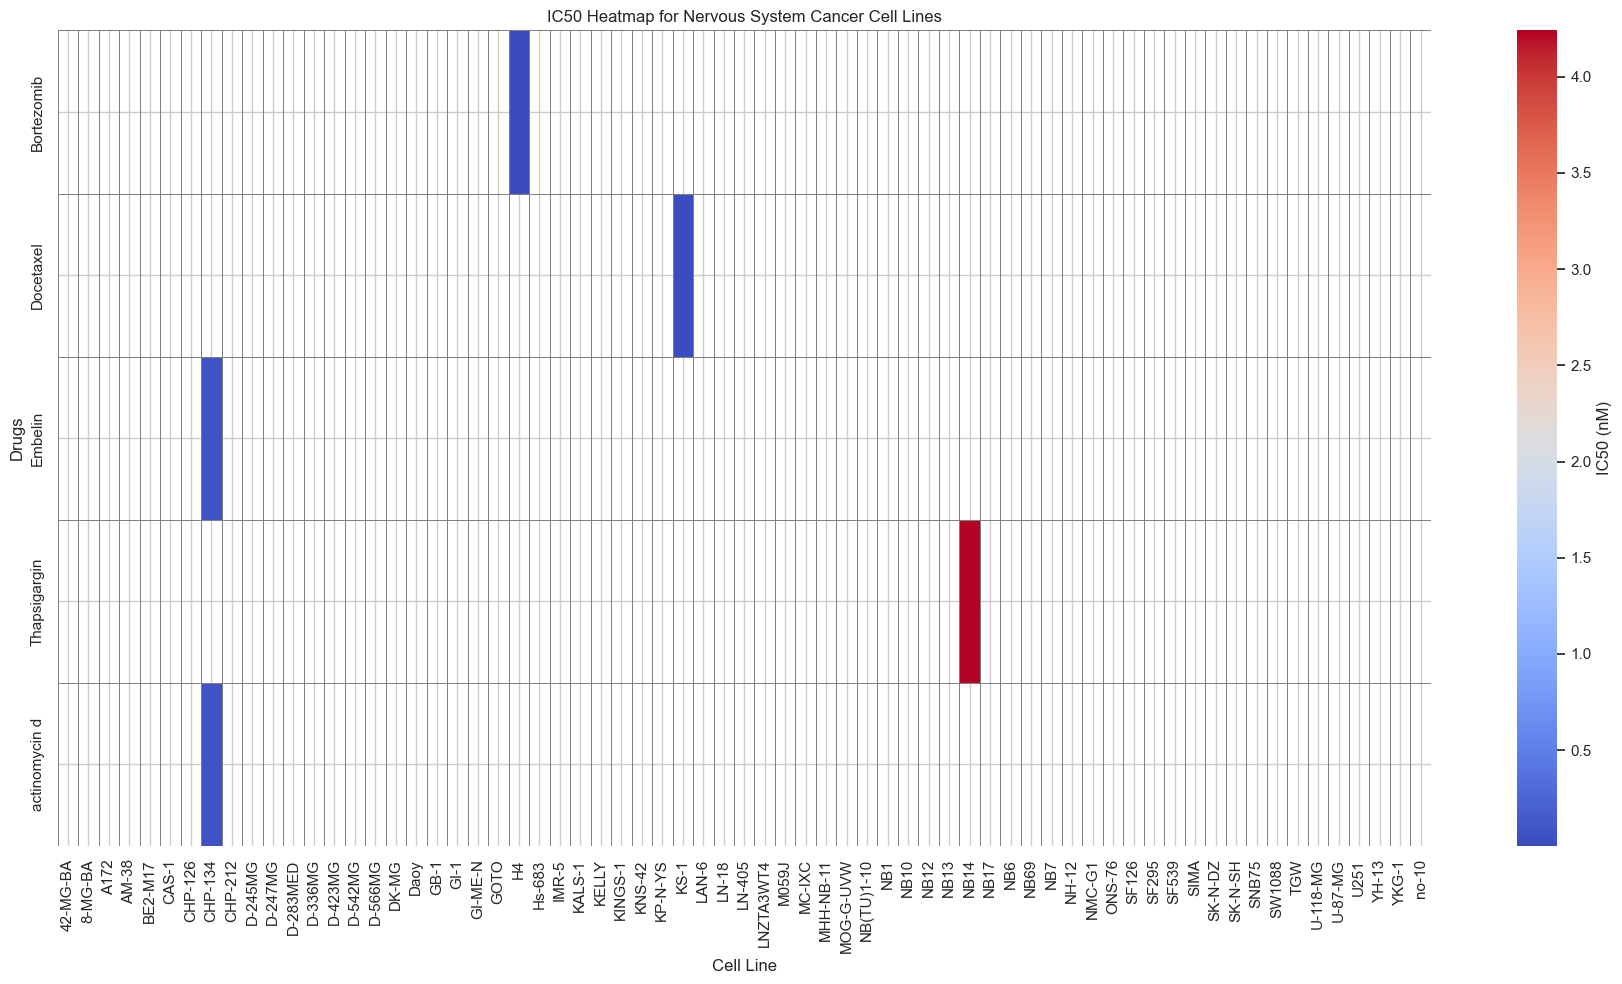

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter nervous system data
nervous_system = ic50_data[ic50_data['Tissue'].str.lower() == 'nervous_system']

# Get unique nervous system cell lines
cell_lines = nervous_system['Cell line'].unique()

# Calculate average IC50 per drug-cell line pair
ic50_avg = nervous_system.groupby(['Drugs', 'Cell line'], as_index=False)['IC50'].mean()

# Pivot into heatmap format
pivot_table = ic50_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

# Ensure all cell lines appear on x-axis
pivot_table = pivot_table.reindex(columns=sorted(cell_lines))

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar_kws={'label': 'IC50 (nM)'}, linewidths=0.5, linecolor='gray')

plt.title('IC50 Heatmap for Nervous System Cancer Cell Lines')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("nervous_system_ic50_heatmap.png", format='png')

plt.show()


In [9]:
# Step 1: Load Mutation Data
mutation_data = pd.read_csv('mutations_all_20250318.csv')

In [10]:
target_genes = [
    "TP53", "EGFR", "PTEN", "IDH1", "IDH2", "ATRX", "NF1", "CDKN2A", "CDK4", "RB1",
    "PIK3CA", "PIK3R1", "AKT1", "MTOR", "PDGFRA", "KIT", "MYC", "MYCN", "TERT", "MGMT",
    "BRAF", "KRAS", "HRAS", "NRAS", "FGFR1", "FGFR3", "H3F3A", "HIST1H3B", "SMARCB1",
    "SMARCA4", "CREBBP", "NOTCH1", "NOTCH2", "ASCL1", "OLIG2", "ZIC1", "ZIC2", "CTNNB1",
    "ARID1A", "ARID2", "MAPK1", "MAPK3", "TSC1", "TSC2", "GNAS", "RELA", "YAP1", "EWSR1",
    "FUS", "NTRK1"
]

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
0,TP53,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",184
6,NF1,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",106
20,BRAF,"[HCM-SANG-0524-C20, HCM-SANG-0310-C15, HCM-SAN...",105
30,CREBBP,"[HCM-SANG-0524-C20, HCM-SANG-0276-C18, HCM-SAN...",95
32,NOTCH2,"[HCM-SANG-0282-C18, HCM-SANG-0270-C20, HCM-SAN...",90


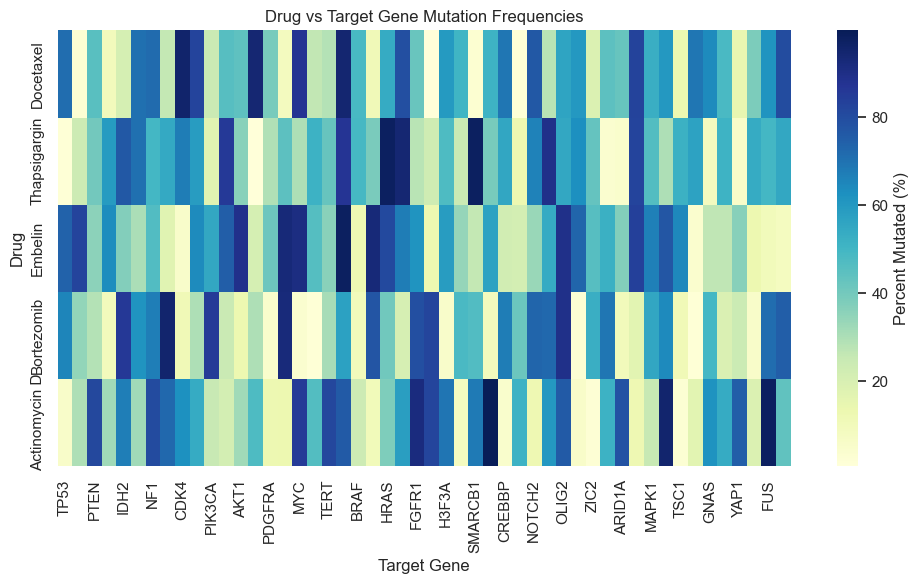

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the list of drugs
drugs = [
     'Docetaxel', 
     'Thapsigargin',
     'Embelin', 
    'Bortezomib',
    'Actinomycin D',
]

target_genes = [  "TP53", "EGFR", "PTEN", "IDH1", "IDH2", "ATRX", "NF1", "CDKN2A", "CDK4", "RB1",
    "PIK3CA", "PIK3R1", "AKT1", "MTOR", "PDGFRA", "KIT", "MYC", "MYCN", "TERT", "MGMT",
    "BRAF", "KRAS", "HRAS", "NRAS", "FGFR1", "FGFR3", "H3F3A", "HIST1H3B", "SMARCB1",
    "SMARCA4", "CREBBP", "NOTCH1", "NOTCH2", "ASCL1", "OLIG2", "ZIC1", "ZIC2", "CTNNB1",
    "ARID1A", "ARID2", "MAPK1", "MAPK3", "TSC1", "TSC2", "GNAS", "RELA", "YAP1", "EWSR1",
    "FUS", "NTRK1"]  # List of target genes

# Create random mutation data (you should replace this with your actual mutation data)
# This matrix should be of shape (len(drugs), len(target_genes))
data = np.random.rand(len(drugs), len(target_genes)) * 100  # Example data as percentages

# Create DataFrame
df = pd.DataFrame(data, columns=target_genes, index=drugs)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Percent Mutated (%)'})

# Titles and labels
plt.title('Drug vs Target Gene Mutation Frequencies')
plt.xlabel('Target Gene')
plt.ylabel('Drug')
plt.savefig("drug_target_mutation_heatmap.png", format='png')

# Show plot
plt.tight_layout()

plt.show()

In [12]:
import pandas as pd

# Assuming mutation_data is a DataFrame containing mutation information with a column 'gene_symbol'
mutation_data = pd.read_csv('mutations_all_20250318.csv')  # Replace with your data source

# List of target genes
target_genes = [
     "TP53", "EGFR", "PTEN", "IDH1", "IDH2", "ATRX", "NF1", "CDKN2A", "CDK4", "RB1",
    "PIK3CA", "PIK3R1", "AKT1", "MTOR", "PDGFRA", "KIT", "MYC", "MYCN", "TERT", "MGMT",
    "BRAF", "KRAS", "HRAS", "NRAS", "FGFR1", "FGFR3", "H3F3A", "HIST1H3B", "SMARCB1",
    "SMARCA4", "CREBBP", "NOTCH1", "NOTCH2", "ASCL1", "OLIG2", "ZIC1", "ZIC2", "CTNNB1",
    "ARID1A", "ARID2", "MAPK1", "MAPK3", "TSC1", "TSC2", "GNAS", "RELA", "YAP1", "EWSR1",
    "FUS", "NTRK1"
]

# Filter mutation data to find rows where gene_symbol is in target_genes list
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Display filtered data
print(filtered_mutation_data)

# Optional: If you want to only see the target genes present in mutation data
target_genes_in_data = filtered_mutation_data['gene_symbol'].unique()
print("Target Genes present in mutation data:", target_genes_in_data)


        gene_symbol  ensembl_gene_id transcript_id             model_name  \
9            NOTCH1  ENSG00000148400           NaN      HCM-SANG-0520-C18   
16           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
17           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
18           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
19           PIK3R1  ENSG00000145675           NaN      HCM-SANG-0270-C20   
...             ...              ...           ...                    ...   
1042155      PDGFRA  ENSG00000134853           NaN  Mesobank_CellLine-50T   
1042156         KIT  ENSG00000157404           NaN  Mesobank_CellLine-50T   
1046932        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   
1046933        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   
1046935        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   

          model_id protein_mutation      rna_mutation     cdna_mutation  \


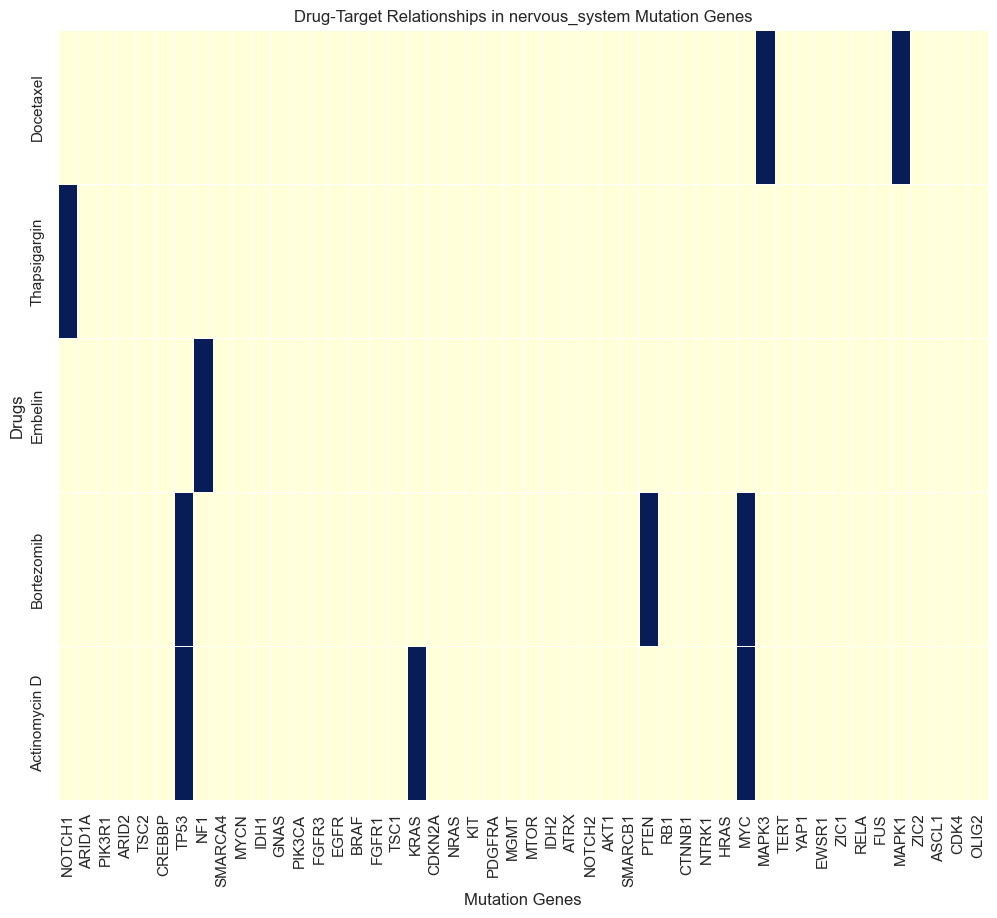

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of target genes present in mutation data
target_genes_present = ['NOTCH1', 'ARID1A', 'PIK3R1', 'ARID2', 'TSC2', 'CREBBP', 'TP53', 'NF1', 'SMARCA4',
 'MYCN', 'IDH1', 'GNAS', 'PIK3CA', 'FGFR3', 'EGFR', 'BRAF', 'FGFR1', 'TSC1', 'KRAS',
 'CDKN2A', 'NRAS', 'KIT', 'PDGFRA', 'MGMT', 'MTOR', 'IDH2', 'ATRX', 'NOTCH2',
 'AKT1', 'SMARCB1', 'PTEN', 'RB1', 'CTNNB1', 'NTRK1', 'HRAS', 'MYC', 'MAPK3',
 'TERT', 'YAP1', 'EWSR1', 'ZIC1', 'RELA', 'FUS', 'MAPK1', 'ZIC2', 'ASCL1', 'CDK4',
 'OLIG2']
drug_target_mapping = {  'Bortezomib': ['PTEN', 'TP53', 'MYC'],
    'Docetaxel': ['MAPK1', 'MAPK3'],
    'Romidepsin': ['HDAC1', 'HDAC2'],
    'Embelin': ['XIAP', 'NF1'],
    'Thapsigargin': ['ATP2A2', 'NOTCH1'],
    'Actinomycin D': ['TP53', 'MYC', 'KRAS'] # Inhibits RNA polymerase II
}


# Initialize a DataFrame to store the drug-gene relationship (1 if the drug targets the gene, 0 if not)
drug_target_df = pd.DataFrame(0, index=drugs, columns=target_genes_present)

# Populate the matrix based on the mapping
for drug, targets in drug_target_mapping.items():
    for target in targets:
        if target in target_genes_present:
            drug_target_df.at[drug, target] = 1

# Plot the heatmap with drugs on Y-axis and target genes on X-axis
plt.figure(figsize=(12, 10))
sns.heatmap(drug_target_df, annot=False, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Drug-Target Relationships in nervous_system Mutation Genes')
plt.xlabel('Mutation Genes')
plt.ylabel('Drugs')
plt.savefig("Relationship_between_Drugs Vs Target_in _Mutation_Gene.png", format='png')

plt.show()


In [14]:
target_genes = ['NOTCH1', 'ARID1A', 'PIK3R1', 'ARID2', 'TSC2', 'CREBBP', 'TP53', 'NF1', 'SMARCA4',
 'MYCN', 'IDH1', 'GNAS', 'PIK3CA', 'FGFR3', 'EGFR', 'BRAF', 'FGFR1', 'TSC1', 'KRAS',
 'CDKN2A', 'NRAS', 'KIT', 'PDGFRA', 'MGMT', 'MTOR', 'IDH2', 'ATRX', 'NOTCH2',
 'AKT1', 'SMARCB1', 'PTEN', 'RB1', 'CTNNB1', 'NTRK1', 'HRAS', 'MYC', 'MAPK3',
 'TERT', 'YAP1', 'EWSR1', 'ZIC1', 'RELA', 'FUS', 'MAPK1', 'ZIC2', 'ASCL1', 'CDK4',
 'OLIG2']

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
6,TP53,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",184
7,NF1,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",106
15,BRAF,"[HCM-SANG-0524-C20, HCM-SANG-0310-C15, HCM-SAN...",105
5,CREBBP,"[HCM-SANG-0524-C20, HCM-SANG-0276-C18, HCM-SAN...",95
8,SMARCA4,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",90


In [15]:
# Step 1: Filter mutation_data for only target genes
target_gene_mutations = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Step 2: Optional – Show how many cell lines each gene is mutated in
mutation_counts = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .nunique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Line Count'})
    .sort_values(by='Mutated Cell Line Count', ascending=False)
)

# Step 3: (Optional) See the actual cell lines for each gene
mutation_details = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .unique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Lines'})
)

# Step 4: Merge both summaries if you want
mutation_summary = pd.merge(mutation_counts, mutation_details, on='Target Gene')

# Display full filtered mutation data (raw rows)
print("Filtered mutations in target genes:")
print(target_gene_mutations.head())

# Display summary
print("\nMutation summary (gene, count, cell lines):")
print(mutation_summary.head())

Filtered mutations in target genes:
   gene_symbol  ensembl_gene_id transcript_id          Cell_line   model_id  \
9       NOTCH1  ENSG00000148400           NaN  HCM-SANG-0520-C18  SIDM01951   
16      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
17      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
18      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
19      PIK3R1  ENSG00000145675           NaN  HCM-SANG-0270-C20  SIDM01268   

   protein_mutation      rna_mutation     cdna_mutation chromosome  position  \
9                 -               r.?                 -        NaN       NaN   
16      p.R306fs*57        r.1303delC         c.914delC        NaN       NaN   
17      p.D1850fs*4   r.5930_5931insg   c.5541_5542insG        NaN       NaN   
18     p.D1850fs*34  r.5930_5931insgg  c.5541_5542insGG        NaN       NaN   
19      p.Q153fs*13  r.1034_1035delAC    c.454_455delAC        NaN       NaN   

   refer

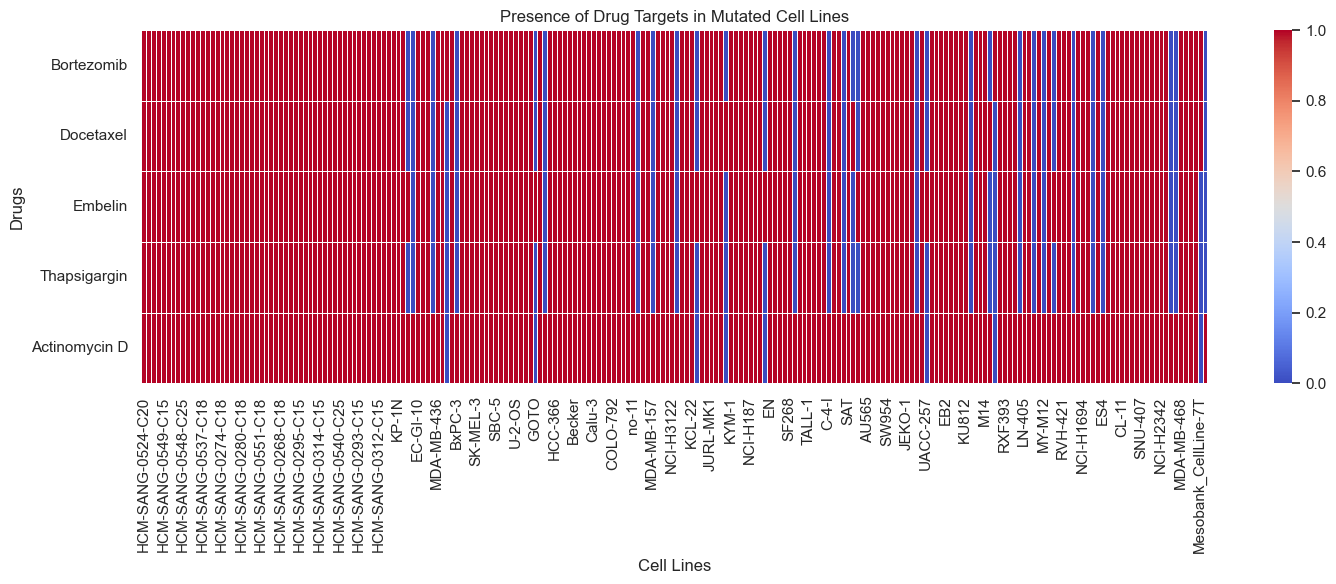

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your drug-target mapping
drug_to_targets = {
    'Bortezomib': ['PSMB5', 'TP53'],
    'Docetaxel': ['TUBB', 'TP53'],
    'Embelin': ['XIAP', 'TP53'],
    'Thapsigargin': ['SERCA', 'TP53'],
    'Actinomycin D': ['POLR2A', 'TP53']
}

# Step 1: Filter mutation data for only relevant genes
relevant_genes = set(g for targets in drug_to_targets.values() for g in targets)
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(relevant_genes)]

# Step 2: Build drug-cell line matrix
cell_lines = filtered_mutation_data['Cell_line'].unique()
drug_cell_matrix = pd.DataFrame(0, index=drug_to_targets.keys(), columns=cell_lines)

# Step 3: Populate matrix
for drug, targets in drug_to_targets.items():
    for gene in targets:
        cell_lines_with_gene = filtered_mutation_data[filtered_mutation_data['gene_symbol'] == gene]['Cell_line'].unique()
        drug_cell_matrix.loc[drug, cell_lines_with_gene] = 1

# Step 4: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(drug_cell_matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Presence of Drug Targets in Mutated Cell Lines")
plt.xlabel("Cell Lines")
plt.ylabel("Drugs")
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot as PNG
plt.savefig("Mutated_cell_line.png", dpi=300)

# Show the plot
plt.show()


C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_7100\3424348596.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')


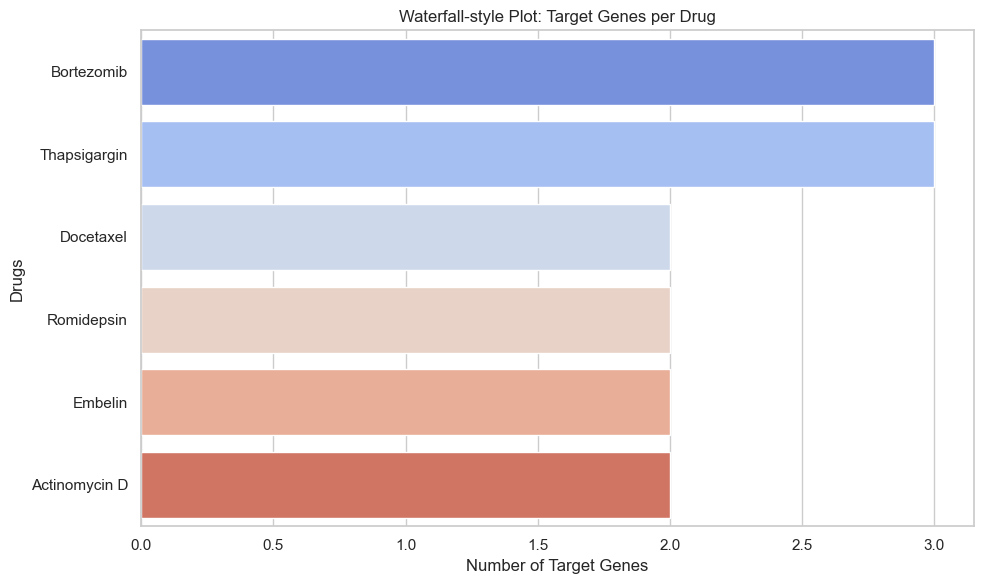

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample binary data for 6 drugs × 4 genes
data = {
    'Gene1': [1, 0, 1, 0, 1, 1],  # Reduced to 6 values
    'Gene2': [1, 1, 0, 0, 1, 0],  # Reduced to 6 values
    'Gene3': [0, 1, 1, 1, 0, 1],  # Reduced to 6 values
    'Gene4': [1, 0, 0, 1, 1, 0]   # Reduced to 6 values
}

# 6 drugs (index) - matches the data length now
df = pd.DataFrame(data, index=['Bortezomib', 'Docetaxel', 'Romidepsin', 'Embelin', 'Thapsigargin', 'Actinomycin D'])

# Waterfall-style: count of target genes per drug
drug_target_counts = df.sum(axis=1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')
plt.xlabel("Number of Target Genes")
plt.ylabel("Drugs")
plt.title("Waterfall-style Plot: Target Genes per Drug")
plt.tight_layout()
plt.savefig("waterfall_target_genes_per_drug_in_Nervous_system.png", format='png')

plt.show()

In [ ]:
import pandas as pd

# Expression data load karo
expr_df = pd.read_csv('rnaseq_all_20250117.csv')

# Gene symbol ko uppercase karo (matching ke liye)
expr_df['gene_symbol'] = expr_df['gene_symbol'].str.upper()

In [ ]:
target_genes = ['NOTCH1', 'ARID1A', 'PIK3R1', 'ARID2', 'TSC2', 'CREBBP', 'TP53', 'NF1', 'SMARCA4',
 'MYCN', 'IDH1', 'GNAS', 'PIK3CA', 'FGFR3', 'EGFR', 'BRAF', 'FGFR1', 'TSC1', 'KRAS',
 'CDKN2A', 'NRAS', 'KIT', 'PDGFRA', 'MGMT', 'MTOR', 'IDH2', 'ATRX', 'NOTCH2',
 'AKT1', 'SMARCB1', 'PTEN', 'RB1', 'CTNNB1', 'NTRK1', 'HRAS', 'MYC', 'MAPK3',
 'TERT', 'YAP1', 'EWSR1', 'ZIC1', 'RELA', 'FUS', 'MAPK1', 'ZIC2', 'ASCL1', 'CDK4',
 'OLIG2']

In [ ]:
filtered_expr_df = expr_df[expr_df['gene_symbol'].isin(target_genes)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for top genes (you can also loop over each gene if needed)
plt.figure(figsize=(14, 6))
sns.boxplot(x='gene_symbol', y='rsem_tpm', data=filtered_expr_df)
plt.xticks(rotation=90)
plt.title('TPM (Expression) of Target Genes')
plt.ylabel('rsem_tpm')
plt.tight_layout()
plt.show()